# Ice Cream Sales vs. Temperature
## Build a Linear Regression model using Scikit-learn



![Image Description](https://github.com/scottalanturner/AI-ML-Labs/blob/main/Linear-Regression/images/linear-regression.png?raw=true)


![Image Description](https://github.com/scottalanturner/AI-ML-Labs/blob/main/Linear-Regression/images/ice-cream.png?raw=true)

# Import Python libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Understanding Variables in Regression

In regression analysis, we examine relationships between variables. Consider the example of ice cream sales and temperature:

- Independent variable (also called regressor, explanatory, predictor, or input variable): Temperature
- Dependent variable (also called regressand, response, or output variable): Ice cream sales

The relationship appears straightforward: ice cream sales tend to increase as temperature increases.

In [4]:
sales_df = pd.read_csv('https://github.com/scottalanturner/AI-ML-Labs/blob/main/Linear-Regression/data/IceCreamData.csv?raw=true')

sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


# Perform data visualization

When examining relationships between variables, we consider:

- Direction: Positive (direct) or negative (indirect) relationship
- Form: Linear or non-linear relationship
- Strength: Weak, moderate, or strong relationship
- Caution: Be aware of outliers that can distort the relationship


<Axes: xlabel='Temperature', ylabel='Revenue'>

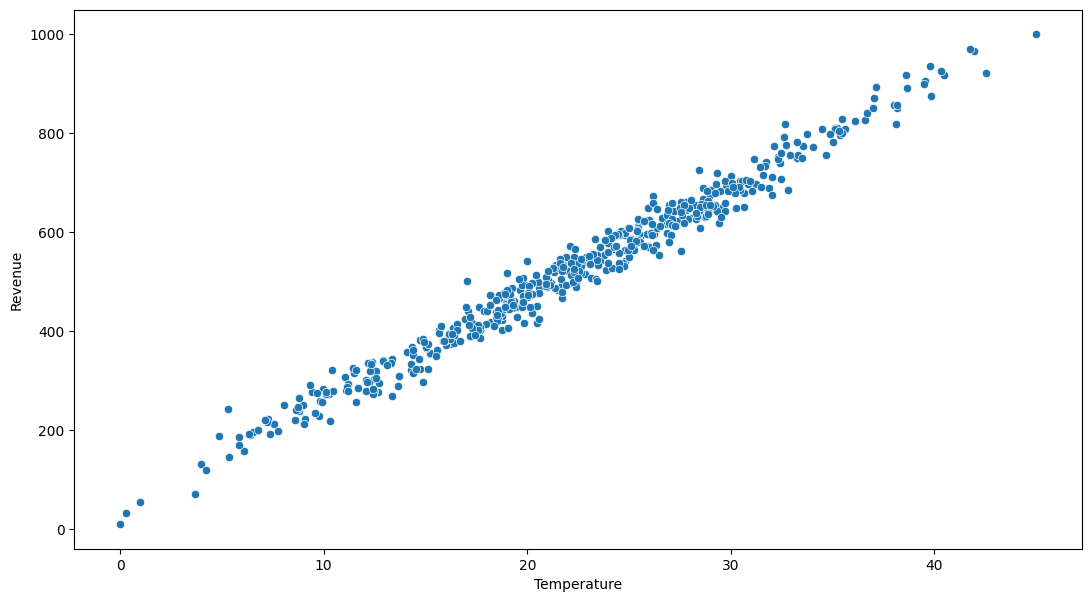

In [ ]:
plt.figure(figsize = (13,7))
sns.scatterplot(x = 'Temperature', y = 'Revenue', data = sales_df)

# Simple Linear Regression
Linear regression studies linear, additive relationships between variables. Simple linear regression specifically describes the linear relationship between exactly two variables.

We fit a line to data, finding the line that "best" fits the observed data points. This allows us to:

1. Understand the relationship between variables
2. Make predictions based on this relationship

# Create training and testing datasets

We divide the data into training data that we use to build the model, and testing data that is used to evaluate how well the model performs (how good is it?)

'Good' is a relative term. There are many different ways to evaluate a model. The stake holders will define what is acceptable for a model's performance.

In [ ]:
X = sales_df['Temperature'].values.reshape(-1, 1)  # Reshape to 2D array
y = sales_df['Revenue'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit the model to the training data

## The Formal Problem Statement
The regression problem can be formally stated as:

- Find the line that "best" fits the data
- More precisely: given a set of (x, y) pairs, find a line such that the squared distance between each of the points and the line is minimized
- These distances are called residuals
- The regression problem aims to minimize the sum of the squared residuals

In [ ]:
SimpleLinearRegression = LinearRegression(fit_intercept = True)
SimpleLinearRegression.fit(X_train, y_train)


# Evaluate the trained model

Text(0.5, 1.0, 'Revenue Generated vs Temperature')

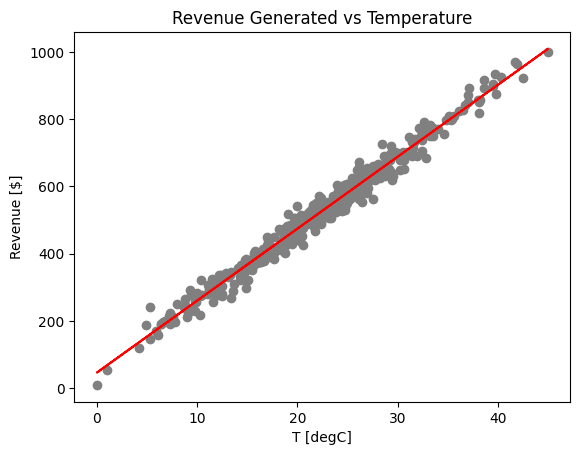

In [ ]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, SimpleLinearRegression.predict(X_train), color = 'red')
plt.ylabel('Revenue [$]')
plt.xlabel('T [degC]')
plt.title('Revenue Generated vs Temperature')

# Interpreting the Regression Line
For a regression line y = a + bx:

- The slope b represents the change in y for a one-unit increase in x
- The intercept a is the predicted value of y when x is zero

Note: If x never equals zero in your dataset, the intercept may lack practical meaning

Important caution: It's dangerous to make predictions outside the range of measured x values, as we don't know if the relationship holds beyond the observed data range. For example, if the lowest temperature in our ice cream data was 3 degrees, making a prediction about what the revenue will be if it's -1 degree wouldn't be reliable (a poor example in this case, given any extreme temperatures).

# Determine the accuracy of the model

In [ ]:
accuracy_LinearRegression = SimpleLinearRegression.score(X_test, y_test)
accuracy_LinearRegression

0.9771532792713993

# Plot the predicted revenue

Text(0.5, 1.0, 'Predicted Revenue vs Temperature')

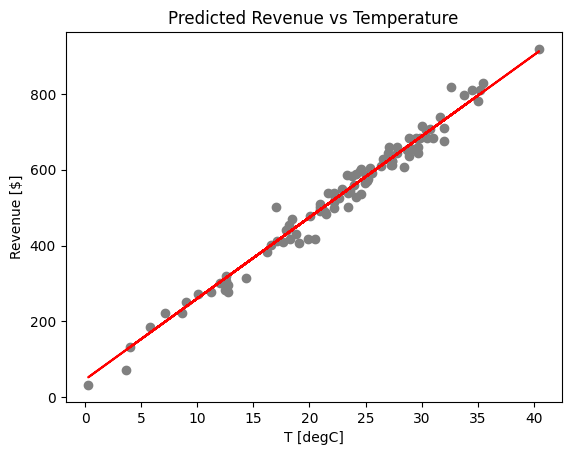

In [ ]:
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, SimpleLinearRegression.predict(X_test), color = 'red')
plt.ylabel('Revenue [$]')
plt.xlabel('T [degC]')
plt.title('Predicted Revenue vs Temperature')

# Predict the revenue for a given temperature

In [ ]:
def predict_revenue(temperature):
    # Reshape the single temperature value into a 2D array
    temp_2d = np.array(temperature).reshape(-1, 1)

    # Make the prediction using the global model
    predicted_revenue = SimpleLinearRegression.predict(temp_2d)

    # Print the result
    print(f"Temperature: {temperature}°C")
    print(f"Predicted Revenue: ${predicted_revenue[0]:.2f}")

    return predicted_revenue[0]

# Example usage:
#Change the temperature in Celsius, then run the cell to see the predicted revenue

temperature = 24
predict_revenue(temperature)

Temperature: 24°C
Predicted Revenue: $559.97


np.float64(559.972013804505)